Ceritanya, Kita mempunyai sebuah pusat perbelanjaan/supermarket mall dan memiliki data pelanggan seperti customer ID, umur, gender,annual income (pendapatan tahunan), dan skor pengeluaran.

Problem statement:
Pusat Perbelanjaan Mall ingin memahami perilaku pelanggan, tapi tidak memiliki segmentasi atau klasifikasi yang jelas. Berikut adalah masalah yang dihadapi:
- Tidak tahu pelanggan mana yang paling aktif
- Tidak bisa membedakan siapa pelanggan hemat atau loyal
-  Strategi pemasarna masih umum dan tidak terarah

Tujuan: melakukan segmentasi pelanggan untuk strategi pemasaran.

harapan:
- Menargetkan pelanggan dengan tepat --> misalnya promo khusus dengan skor pengeluaran tiggi
- Menghemat anggaran pemasaran --> karena promosi hanya diberikan segmen potensial
- Menyusun produk & layanan yang sesuai --> contoh: fashion & style untuk segmen muda, dan kenyamanan untuk segmen senior
- Meningkatkan loyalitas pelanggan --> Dengan penawaran yang lebih personal dan relevan
- Menemukan peluang pertumbuhan --> segmen "silent splender" --> sedukasi & upsell

Algoritma yang digunakan: Clustering K-Means

Alasan menggunakan algoritma Clustering K-Means:
- Segmentasi pelanggan tanpa label
- Cocok untuk fitur numerik
- Mudah diinterpretasikan
- Cepat

Dataset yang digunakan: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python



Pertama, kita input beberapa library:
- input pandas as pd untuk membaca file dataset (CSV, Excel,dll), mengolah data tabular untuk filter kolom, mengganti nama, agregasi, dll.
- matplotlib.pyplot untuk library dasar grafik (bar, scatter, line)
- seaborn sebagai wrapper untuk matplotlib supata lebih cantik dan mudah dipakai
- KMeans dari sklearn.cluster: algoritma clustering untuk mengelompokkan data ke dalam beberapa segmen berdasarkan kemiripan fitur numerik
- StandardScaler dari sklearn.preprocessing: berfungsi untuk menstandarisasi fitur numerik menjadi mean=0 dan std=1, dan K-Means menghitung jarak Euclidean --> skala fitur harus setara



In [1]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/drive/MyDrive/HACKTIV8/FINAL PROJECT/Clustering Segmentasi Pelanggan/Mall_Customers.csv')

perintah di atas untuk membaca file CSV yang berisi data pelanggan mall. Data di atas berisi kolom: CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)

In [2]:
# load dataset
df = pd.read_csv('/content/drive/MyDrive/HACKTIV8/FINAL PROJECT/Clustering Segmentasi Pelanggan/Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Melakukan EDA (visualisasi):
- Distribusi gender
- Distribusi umur
- Distribusi pendapatan tahunan
- Distribusi skor pengeluaran
- Hubungan antara pendapatan dan skor pengeluaran

Distribusi Gender:
mengetahui proporsi pelanggan laki-laki vs perempuan

Jika perempuan lebih dominan, kampanye bisa disesuaikan dengan preferensi mereka

<ipython-input-3-87434585676e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')


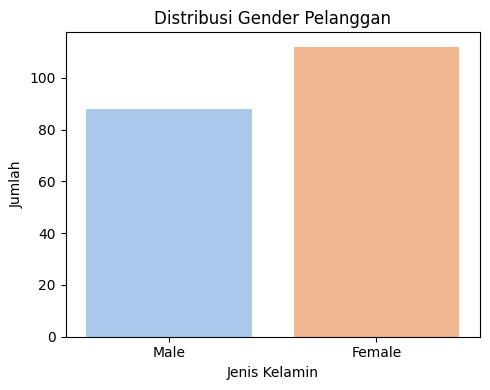

In [3]:
# Distribusi Gender
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Distribusi Gender Pelanggan')
plt.ylabel('Jumlah')
plt.xlabel('Jenis Kelamin')
plt.tight_layout()
plt.show()

Distribusi umur pelanggan: mengetahui mayoritas rentang usia pelanggan. Jika didominasi oleh usia 20-40 tahun, strategi pemasaran bisa difokuskan ke digital/media sosial.

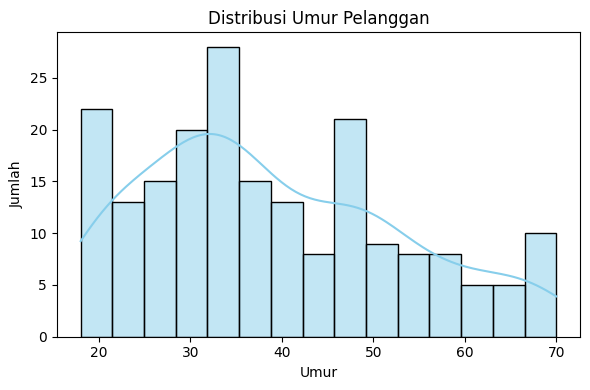

In [4]:
# Distribusi umur pelanggan
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title('Distribusi Umur Pelanggan')
plt.xlabel('Umur')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

Distribusi Pendapatan tahunan:
Menilai daya beli pelanggan.
- Pelanggan berpenghasilan menengah ke atas, bisa ditawarkan produk premium.
- Pelanggan pendapatan rendah --> promo, diskon



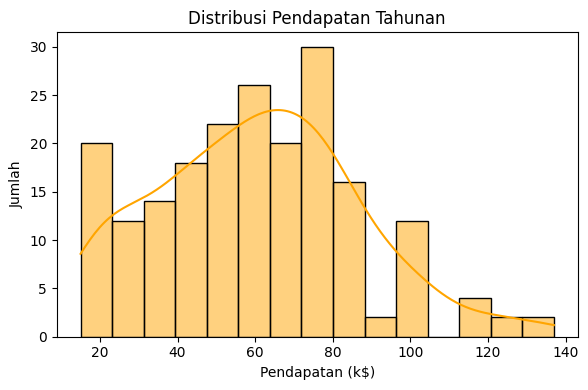

In [5]:
# Distribusi Pendapat Tahunan
plt.figure(figsize=(6, 4))
sns.histplot(df['Annual Income (k$)'], bins=15, kde=True, color='orange')
plt.title('Distribusi Pendapatan Tahunan')
plt.xlabel('Pendapatan (k$)')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

Distribusi Skor Pengeluaran: Mengungkap seberapa aktif pelanggan berbelanja. Jika banyak yang memiliki skor rendah, strategi retensi/engagement bisa diprioritaskan.

Contoh penggunaan: Pelanggan dengan skor pengeluaran tinggi adalah target potensial untuk program loyalti atau rekomendasi produk berkualitas

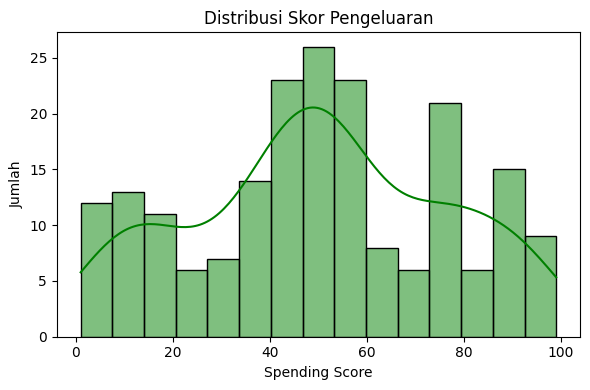

In [6]:
# Distribusi skor pengeluaran
plt.figure(figsize=(6, 4))
sns.histplot(df['Spending Score (1-100)'], bins=15, kde=True, color='green')
plt.title('Distribusi Skor Pengeluaran')
plt.xlabel('Spending Score')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

Hubungan antara pendapatan dan skor pengeluaran dibuat dengan tujuan untuk mengindentifikasi segmen strategis:
- Penghasilan tinggi + pengeluaran tinggi --> Pelanggan loyal premium
- Penghasilan tinggi + Pengeluaran rendah --> Bisa ditarget dengan penawaran menarik
- Penghasilan rendah + pengeluaran tinggi --> bisa jadi impulsif, cocok untuk diskon

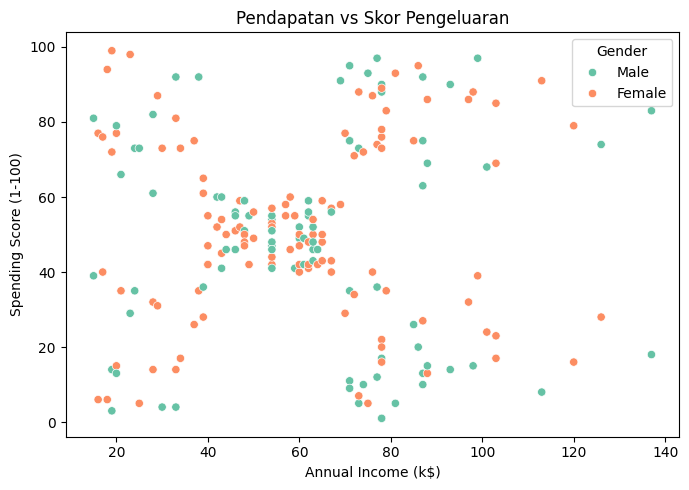

In [7]:
# Hubungan antara pendapatan dan skor pengeluaran
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',hue='Gender', palette='Set2')
plt.title('Pendapatan vs Skor Pengeluaran')
plt.tight_layout()
plt.show()

Pemilihan fitur yang relevan bertujuan untuk:
1. Memilih fitur yang relevan:
Kita ingin mengelompokkan pelanggan berdasarkan karakteristik utama yang memengaruhi perilaku belanja mereka. Fitur yang dipilih:
  - Age --> usia pelanggan (mempengaruhi preferensi dan daya beli)
  - Annual income (k$) --> pendapatan tahunan (mencerminkan kemampuan fiannsial)
  - Spending sccore (1-100) --> seberapa sering/mudah pelanggan berbelanja (indikasi loyalitas atau kebiasaan konsumtif)

2. Menyiapkan data untuk clustering (X sebagai input):
  - K-Means hanya menerima fitur numerik, bukan seluruh DataFrame
  - Dengan x = df[...], kita membuat variabel x berisi hanya kolom yang relevan sebagai input ke model

3. Membuang fitur yang tidak dibutuhkan:
contoh: customerID dan Gender tidak dimasukkan karena:
  - CustomerID: hanya ID unit, tidak bermakna secara perilaku
  - Gender: kategorikal --> butuh encoding, dan tidak sekuat 3 fitur numerik dalam menentukan segmen



In [8]:
# Pilih fitur yang relevan
X = df[['Age','Annual Income (k$)','Spending Score (1-100)']]

Standarisasi fitur bertujuan untuk:
  - Mengubah semau fitur (Age, Annual Income, Spending score) agar memiliki: rata-rata (mean) sebesar 0, dan standard deviasi (std) sebesar 1

K-Means Clustering menggunakan jarak euclidean, jika fitur seperti Annual Income bernilai 0-150, sementara spending score hanya 1-100, maka fitur dengan angka lebih besar akan mendominasi hasil clustering,

Dengan StandardScaler(), kita memastikan:
- Age: 18 s/d 70 (sebelum standarisasi) menjadi -2.0 s/d +2.0 setelah standarisasi

- Annual Income: skala 15 s/d 150 (sebelum standarisasi) menjadi skala -2.5 s/d +2.5 (setelah standarisasi)

- Spending score: skala 1 s/d 100 (sebelum standarisasi) menjadi -1.5 s/d +1.5 setelah standarisasi

fit_transform:
  - fit untuk menghitung mean dan std dari setiap fitur
  - transform untuk mengaplikasikan rumus Z

Tujuan standarisasi:
- membuat semua fitur memiliki skala yang sama
- agar hasil clusterign adil dan tidak bias terhadap fitur tertentu
- meningkatkan akurasi dan interpretasi algoritma berbasis jarak seperti K-Means


In [9]:
# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Tujuan dari program ini:
- Menentukan jumlah cluster (k) yang optimal dengan menggunakan elbow-method untuk mengetahuinya secara data driven

Apa itu inertia?
- Total dari jumlah kuadrat jarak setiap titik ke pusat clusternya (centroid).
- Makin kecil inertia --> makin rapat cluster-nya
- Tapi: makin banyak k, inertia pasti makin kecil --> kita butuh titik optimal (tidak overfit)


In [10]:
# Cari Jumlah cluster optimal (opsional: elbow method)
inertia = []
for k in range(1, 11):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(X_scaled)
  inertia.append(km.inertia_)


Plot elbow curve bertujuan untuk menampilkan grafik elbow curve


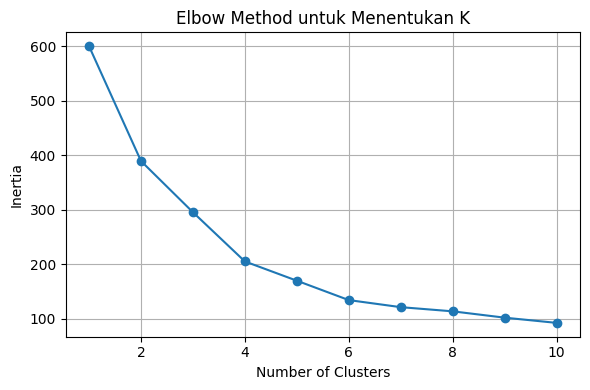

In [11]:
# Plot elbow curve
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan K')
plt.grid(True)
plt.tight_layout()
plt.show()

Melatih model K-Means Clustering dengan jumlah cluster (k=5) dan mengelompokkan data pelanggan ke dalam 5 segmen berdasarkan kemiripan fitur (Age, Annual Income, Spending Score)

In [12]:
# Buat model KMeans dengan jummlah cluster optimal (misalnya 5)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

Gabungkan hasil clustering ke dalam data pelanggan asli, sehingga kamu bisa menganalisis lebih lanjut siapa saja yang masuk ke setiap segmen

In [13]:
# Tambahkan hasil cluster ke DataFrame alsi
df['Cluster'] =  clusters

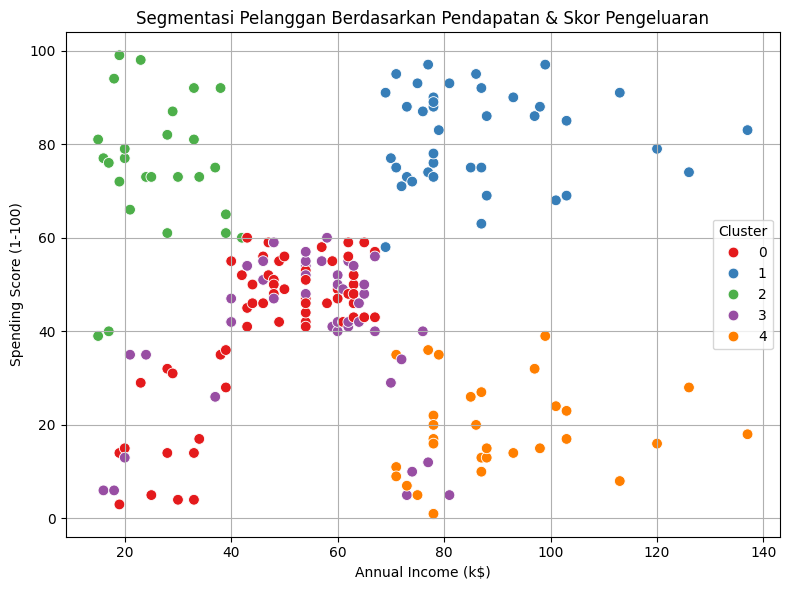

In [14]:
# Visualisasi hasil clustering (2D)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=60)
plt.title('Segmentasi Pelanggan Berdasarkan Pendapatan & Skor Pengeluaran')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

Gambar di atas adalah segmentasi Pelanggan berdasarkan Pendapatan (Annual Income) dan Skor Pengeluaran (Spending Score) dengan menunjukkan 5 kelompok pelanggan (Cluster 0-4). Setiap titik merupakan 1 pelanggan dan warna mewakili cluster hasil K-Means.

Interpretasi Tiap Cluster (berdasarkan persebaran), tiap cluster mewakili tipe pelanggan berbeda, baik dari sisi penghasilan maupun perilaku belanja.

Visualisasi dan tabel sangat membantu untuk mengenali segmen bernilai tinggi dan menentukan strategi pemasaran yang spesifik untuk masing masing kelompok.

Warna:
- Cluster 0 (merah) --> Pendapatan menengah, pengeluaran sedang --> karakteristik dari pelanggan biasa (rata-rata)

- Cluster 1 (biru) --> Pendapatan tinggi, pengeluaran tinggi --> karakteristik dari pelanggan premium dan loyal

- Cluster 2 (Hijau) --> Pendapatan rendah, pengeluaran tinggi --> karakteristik dari pelanggan impulsif atau loyal meski pendapatan rendah

- Cluster 3 (Ungu) --> Pendapatan sedang, pengeluaran rendah --> karakteristik dari pelanggan hemat atau tidak aktif belanja

- Cluster 4 (Oranye) --> Pendapatan tinggi, pengeluaran redah --> karakteristik dari pelanggan potensial, tapi pasif


Segmentasi pelanggan berdasarkan pendapatan dan skor pengeluaran:
- Sumbu X: Annual Income (k$) --> Pendapatan tahunan pelanggan
- Sumbu Y: Spending Score (1-100) --> Seberapa banyak dan sering pelanggan berbelanja
- Warna: Cluster hasil K-Means (0 s/d 4)

Kesimpulan:
visualisasi ini menunjukkan hasil segmentasi pelanggan menggunakan K-Means. Dengan membagi pelanggan berdasarkan perilaku belanja dan daya beli, bisnis dapat:
- Menargetkan kampanye yang lebih relevan.
- Meningkatkan retensi & loyalitas.
- Mengoptimalkan biaya pemasaran.

In [15]:
# Tampilkan beberapa hasil
print(df[['CustomerID','Age','Annual Income (k$)','Spending Score (1-100)', 'Cluster']].head())

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1   19                  15                      39        2
1           2   21                  15                      81        2
2           3   20                  16                       6        3
3           4   23                  16                      77        2
4           5   31                  17                      40        2


Penjelasan per kolom:
- CustomerID: ID unik pelanggan
- Age: Usia Pelanggan
- Annual Income (k$): Pendapatan tahunan (dalam ribuan dollar)
- Spending Score: Indeks antara 1-100 yang menunjukkan kebiasaan belanja pelanggan
- Cluster: Hasil segmentasi dari K-Means (label kelompok pelanggan)

Analisis berdasarkan cluster:
- Cluster 2:
    - Dihuni oleh CustomerID 1,2,4, dan 5
    - Ciri-ciri:
        - Pendapatan rendah (15-17k)
        - Skor pengeluaran sedang hingga tinggi (39, 40, 77, 81)

  Interpretasi:
  pelanggan muda dengan pendapatan rendah, namun memiliki skor pengeluaran yang cukup tinggi

  Strategi:
  - mereka kemungkinan impulsif atau setia belanja meski berpenghasilan rendah, cocok untuk:
      - Promo diskon, cashback
      - loyalty point
      - Program referral

- Cluster 3:
    - Dihuni oleh CustomerID 3
    - Ciri-ciri:
        - Pendapatan rendah (16k)
        - Spending score sangat rendah (6)

  Interpretasi:
  Pelanggan muda, berpenghasilan rendah, dan sangat jarang berbelanja.

  Strategi:
  Perlu pendekatan edukatif:
    - Promosi produk baru
    - Campaign kesadaran merek (brand awareness)
    - Free trial atau kupon percobaan

Kesimpulan:
- Cluster 2: Mesikpun dari kelompok ekonomi bawah, mereka aktif belanja --> kelompok loyal tapi sensitif harga

- Cluster 3: Pelanggan pasif --> bisa jadi belum mengenal merk/produk atau tidak tertarik